In [17]:
import joblib
import os

df_tvl = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_tvl.pkl")
df_volume = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_volume.pkl")
df_fdv = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_fdv.pkl")

print(df_tvl.head())

print(df_volume.head())

print(df_fdv.head())

                 name pair_reserve_in_usd
0  USDC / USDT 0.001%       21027403.7381
1    WETH / USDT 0.3%      130326598.4078
2        sUSDS / USDT       50996525.4175
3  USDe / USDT 0.006%       27761309.1683
4   WETH / USDT 0.05%       31609958.8914
                 name         vol_5m        vol_15m       vol_30m  \
0  USDC / USDT 0.001%   31588.098296  133014.501037  9.994687e+05   
1    WETH / USDT 0.3%    2144.545036    2465.108833  1.989680e+06   
2        sUSDS / USDT  443170.455724  443170.455724  6.729185e+05   
3  USDe / USDT 0.006%       0.000000  922005.051702  3.655310e+06   
4   WETH / USDT 0.05%   88980.578285  236148.077736  1.481031e+06   

         vol_1h        vol_6h       vol_24h  
0  3.777993e+07  6.612070e+07  1.779421e+08  
1  4.829567e+06  7.784039e+06  2.504651e+07  
2  1.521792e+06  1.081943e+07  5.755017e+07  
3  6.014893e+06  2.675126e+07  7.189556e+07  
4  4.310761e+06  1.127126e+07  2.951781e+07  
                 name           fdv_usd
0  USDC / USDT 0.

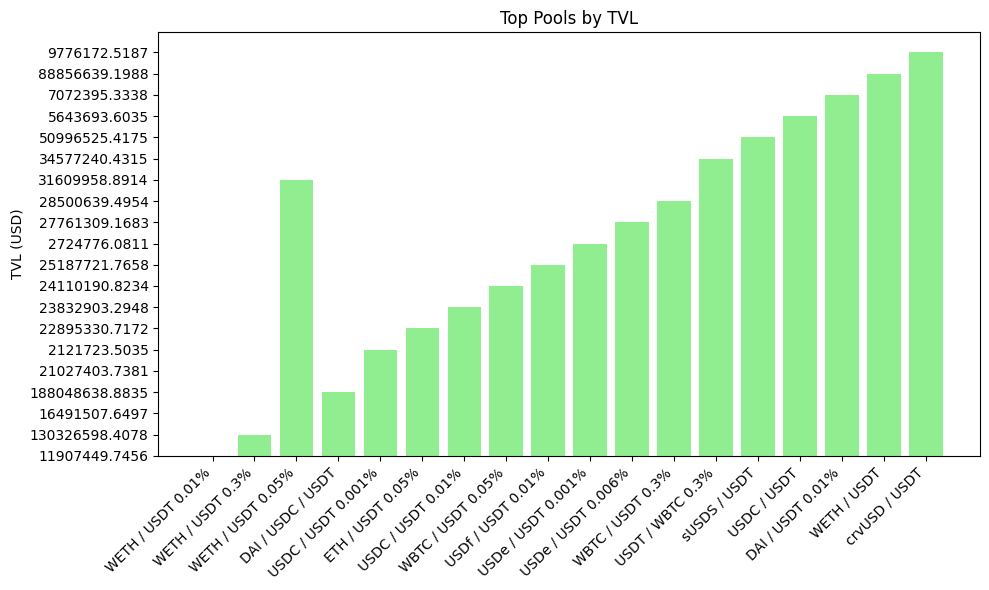

In [18]:
import matplotlib.pyplot as plt
# Sort by TVL (pair_reserve_in_usd) in ascending order
df_sorted = df_tvl.sort_values("pair_reserve_in_usd")

# Plot Top Pools by TVL
plt.figure(figsize=(10,6))
plt.bar(df_sorted["name"], df_sorted["pair_reserve_in_usd"], color="lightgreen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("TVL (USD)")
plt.title("Top Pools by TVL")
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

# Convert column to numeric (float), ignoring any errors
df_tvl['pair_reserve_in_usd'] = pd.to_numeric(df_tvl['pair_reserve_in_usd'], errors='coerce')

# Now sum the column
total_reserve_usd = df_tvl['pair_reserve_in_usd'].sum()

# Print nicely formatted
print(f"Total reserve in USD: ${total_reserve_usd:,.2f}")

Total reserve in USD: $753,468,818.67


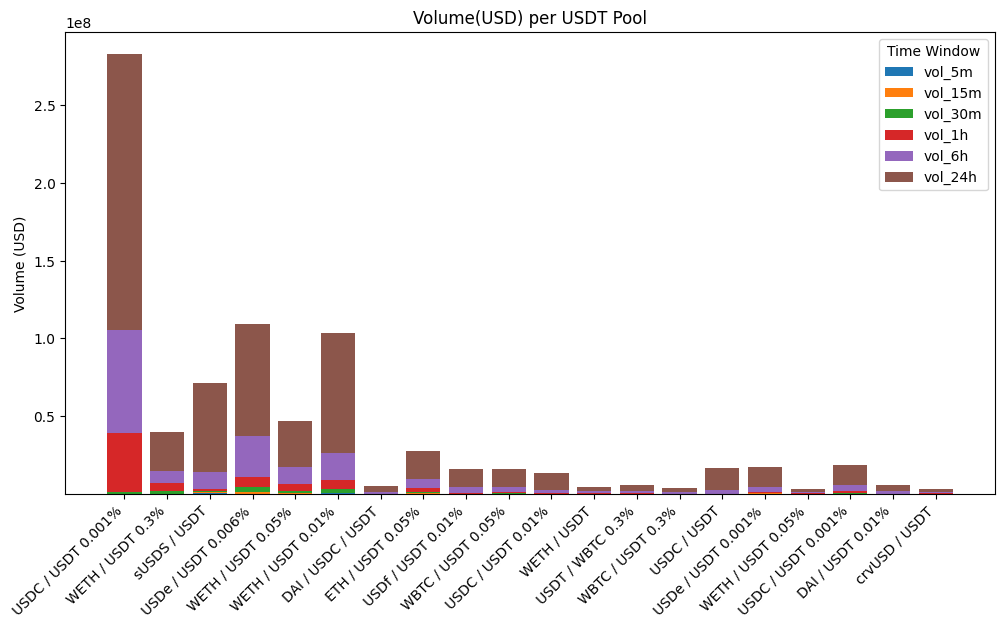

In [20]:
import numpy as np

x = np.arange(len(df_volume['name']))
time_cols = ['vol_5m', 'vol_15m', 'vol_30m', 'vol_1h', 'vol_6h', 'vol_24h']

bottom = np.zeros(len(df_volume))
plt.figure(figsize=(12,6))

for col in time_cols:
    plt.bar(x, df_volume[col], bottom=bottom, label=col)
    bottom += df_volume[col]

plt.xticks(x, df_volume['name'], rotation=45, ha='right')
plt.ylabel("Volume (USD)")
plt.title("Volume(USD) per USDT Pool")
plt.legend(title="Time Window")
plt.show()

In [21]:
cols = ['vol_5m', 'vol_15m', 'vol_30m', 'vol_1h', 'vol_6h', 'vol_24h']

# Convert all columns to numeric
df_volume[cols] = df_volume[cols].apply(pd.to_numeric, errors='coerce')

# Sum all volumes across all pools and time windows
total_volume_usd = df_volume[cols].sum().sum()  # sum per column, then sum all columns

print(f"Total volume in USD: ${total_volume_usd:,.2f}")

Total volume in USD: $809,930,399.84


In [22]:
import pandas as pd

# Clean up column names
df_volume.columns = df_volume.columns.str.strip()
df_tvl.columns = df_tvl.columns.str.strip()

# Select relevant columns
vol = df_volume[["name", "vol_24h"]]
tvl = df_tvl[["name", "pair_reserve_in_usd"]]   # <-- replace with your actual reserve column name

# Convert reserve to numeric (force errors to NaN if bad values)
tvl["pair_reserve_in_usd"] = pd.to_numeric(tvl["pair_reserve_in_usd"], errors="coerce")

# Merge
df = pd.merge(vol, tvl, on="name", how="inner")


# Compute turnover ratio safely
df["turnover_ratio"] = df.apply(
    lambda x: x["vol_24h"] / x["pair_reserve_in_usd"] if x["pair_reserve_in_usd"] and x["pair_reserve_in_usd"] > 0 else None,
    axis=1
)

print(df[["name", "vol_24h", "pair_reserve_in_usd", "turnover_ratio"]].head())

                 name       vol_24h  pair_reserve_in_usd  turnover_ratio
0  USDC / USDT 0.001%  1.779421e+08         2.102740e+07        8.462392
1  USDC / USDT 0.001%  1.779421e+08         2.121724e+06       83.866790
2    WETH / USDT 0.3%  2.504651e+07         1.303266e+08        0.192183
3        sUSDS / USDT  5.755017e+07         5.099653e+07        1.128511
4  USDe / USDT 0.006%  7.189556e+07         2.776131e+07        2.589776


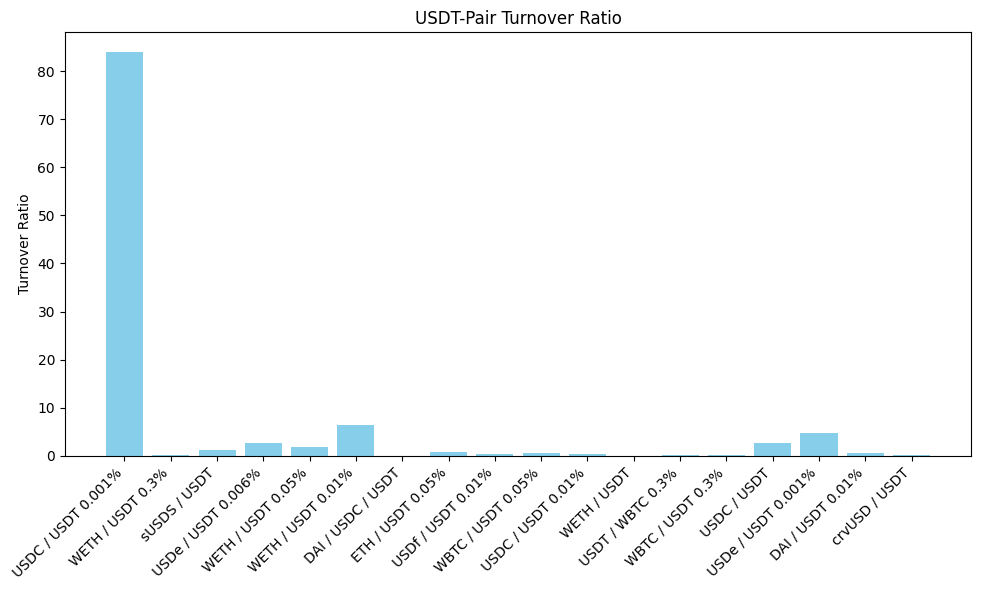

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df["name"], df["turnover_ratio"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Turnover Ratio")
plt.title("USDT-Pair Turnover Ratio")
plt.tight_layout()
plt.show()

In [24]:
df_fdv.columns = df_fdv.columns.str.strip()
df_tvl.columns = df_tvl.columns.str.strip()

vol = df_fdv[["name", "fdv_usd"]]
tvl = df_tvl[["name", "pair_reserve_in_usd"]] 

# Merge on 'name'
df = pd.merge(df_tvl, df_fdv, on="name")

# Ensure numeric types
df["pair_reserve_in_usd"] = pd.to_numeric(df["pair_reserve_in_usd"], errors="coerce")
df["fdv_usd"] = pd.to_numeric(df["fdv_usd"], errors="coerce")

# compute Liquidity Utilization
df["liquidity_utilization"] = df.apply(
    lambda x: x["pair_reserve_in_usd"] / x["fdv_usd"] if x["fdv_usd"] and x["fdv_usd"] > 0 else None,
    axis=1
)

# print selected columns
df[["name", "pair_reserve_in_usd", "fdv_usd", "liquidity_utilization"]].head()

,name,pair_reserve_in_usd,fdv_usd,liquidity_utilization
0,USDC / USDT 0.001%,2.102740e+07,8.702812e+10,0.000242
1,USDC / USDT 0.001%,2.102740e+07,8.703943e+10,0.000242
2,WETH / USDT 0.3%,1.303266e+08,8.705296e+10,0.001497
3,sUSDS / USDT,5.099653e+07,8.661648e+10,0.000589
4,USDe / USDT 0.006%,2.776131e+07,8.705815e+10,0.000319


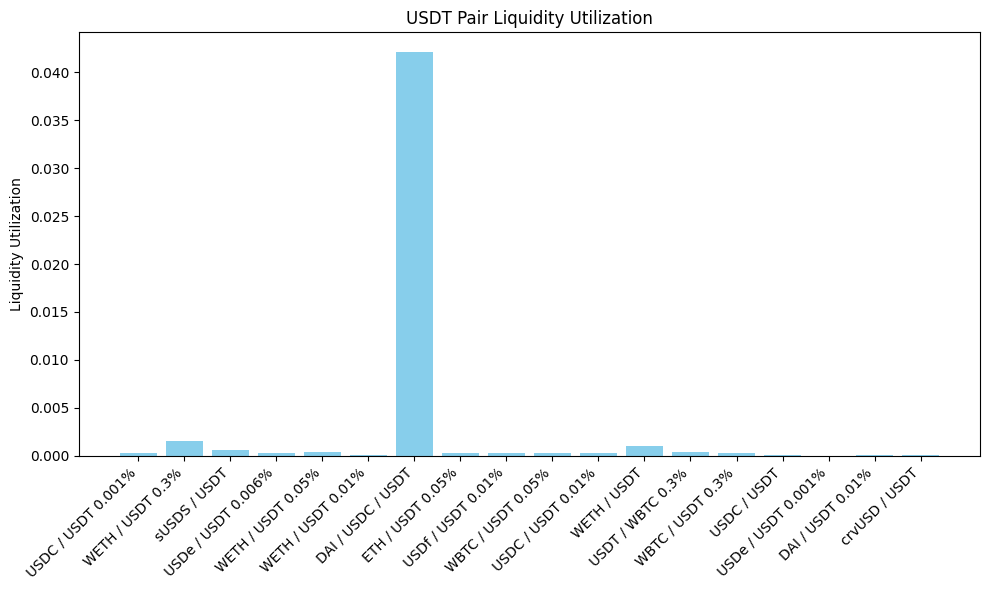

In [25]:
plt.figure(figsize=(10,6))
plt.bar(df["name"], df["liquidity_utilization"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Liquidity Utilization")
plt.title("USDT Pair Liquidity Utilization")
plt.tight_layout()
plt.show()

In [26]:
df_transactions = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_transactions.pkl")

df_transactions.head()

,name,buys_5m,sells_5m,buyers_5m,sellers_5m,buys_15m,sells_15m,buyers_15m,sellers_15m,buys_1h,sells_1h,buyers_1h,sellers_1h,buys_24h,sells_24h,buyers_24h,sellers_24h
0,USDC / USDT 0.001%,2,3,2.0,3.0,5,13,5.0,13.0,37,48,29.0,41.0,847,751,502.0,482.0
1,WETH / USDT 0.3%,1,0,1.0,0.0,3,2,3.0,2.0,21,33,14.0,23.0,226,342,150.0,146.0
2,sUSDS / USDT,2,2,2.0,1.0,2,2,2.0,1.0,7,7,4.0,3.0,149,137,18.0,14.0
3,USDe / USDT 0.006%,0,0,0.0,0.0,8,0,2.0,0.0,8,10,2.0,3.0,96,121,46.0,72.0
4,WETH / USDT 0.05%,8,1,8.0,1.0,12,7,12.0,6.0,72,101,55.0,69.0,1054,1275,616.0,524.0


In [27]:
# Define column groups
buy_cols = ['buys_5m', 'buys_15m', 'buys_1h', 'buys_24h']
sell_cols = ['sells_5m', 'sells_15m', 'sells_1h', 'sells_24h']
buyer_cols = ['buyers_5m', 'buyers_15m', 'buyers_1h', 'buyers_24h']
seller_cols = ['sellers_5m', 'sellers_15m', 'sellers_1h', 'sellers_24h']

# Convert all numeric columns (handles NaN / strings safely)
df_transactions[buy_cols + sell_cols + buyer_cols + seller_cols] = (
    df_transactions[buy_cols + sell_cols + buyer_cols + seller_cols]
    .apply(pd.to_numeric, errors='coerce')
)

# Totals per pool
df_traders = pd.DataFrame({
    "name": df_transactions["name"],
    "total_buys": df_transactions[buy_cols].sum(axis=1),
    "total_sells": df_transactions[sell_cols].sum(axis=1),
    "total_buyers": df_transactions[buyer_cols].sum(axis=1, skipna=True),
    "total_sellers": df_transactions[seller_cols].sum(axis=1, skipna=True),
    # Unique approximation → max across time windows
    "unique_buyers": df_transactions[buyer_cols].max(axis=1, skipna=True),
    "unique_sellers": df_transactions[seller_cols].max(axis=1, skipna=True)
})

df_traders.head()

,name,total_buys,total_sells,total_buyers,total_sellers,unique_buyers,unique_sellers
0,USDC / USDT 0.001%,891,815,538.0,539.0,502.0,482.0
1,WETH / USDT 0.3%,251,377,168.0,171.0,150.0,146.0
2,sUSDS / USDT,160,148,26.0,19.0,18.0,14.0
3,USDe / USDT 0.006%,112,131,50.0,75.0,46.0,72.0
4,WETH / USDT 0.05%,1146,1384,691.0,600.0,616.0,524.0


In [28]:
df_dex = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_dex.pkl")

df_dex.head(10)

,name,dex
0,crvUSD / USDT,uniswap-v4-ethereum
1,crvUSD / USDT,uniswap_v3
2,crvUSD / USDT,curve
3,crvUSD / USDT,uniswap-v4-ethereum
4,crvUSD / USDT,uniswap_v3
5,crvUSD / USDT,uniswap_v3
6,crvUSD / USDT,curve
7,crvUSD / USDT,uniswap-v4-ethereum
8,crvUSD / USDT,uniswap_v3
9,crvUSD / USDT,uniswap_v3


In [29]:
df_pools = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_pools.pkl")

df_pools.head(10)

,id,name,pool_created_at,address,pool_age_days,fee
0,eth_0x8aa4e11cbdf30eedc92100f4c8a31ff748e201d4...,USDC / USDT,2025-04-01 02:10:47+00:00,0x8aa4e11cbdf30eedc92100f4c8a31ff748e201d44712...,158,0.001%
1,eth_0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,WETH / USDT,2021-12-29 12:36:12+00:00,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,1347,0.3%
2,eth_0x00836fe54625be242bcfa286207795405ca4fd10,sUSDS / USDT,2025-04-18 22:52:10+00:00,0x00836fe54625be242bcfa286207795405ca4fd10,140,NaN
3,eth_0xaae9da4a878406eb1de54efac30e239fd56d54fb...,USDe / USDT,2025-08-04 13:21:23+00:00,0xaae9da4a878406eb1de54efac30e239fd56d54fb8051...,33,0.006%
4,eth_0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH / USDT,2021-12-29 12:35:27+00:00,0x11b815efb8f581194ae79006d24e0d814b7697f6,1347,0.05%
5,eth_0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,WETH / USDT,2022-12-26 04:38:06+00:00,0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,985,0.01%
6,eth_0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,DAI / USDC / USDT,2022-07-13 11:48:12+00:00,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1151,NaN
7,eth_0x72331fcb696b0151904c03584b66dc8365bc63f8...,ETH / USDT,2025-01-27 22:08:23+00:00,0x72331fcb696b0151904c03584b66dc8365bc63f8a144...,221,0.05%
8,eth_0xc275a7390966e4bcbf331b837cd7316c4a3efa83,USDf / USDT,2025-02-21 10:43:47+00:00,0xc275a7390966e4bcbf331b837cd7316c4a3efa83,197,0.01%
9,eth_0x56534741cd8b152df6d48adf7ac51f75169a83b2,WBTC / USDT,2022-05-22 19:13:52+00:00,0x56534741cd8b152df6d48adf7ac51f75169a83b2,1202,0.05%


In [30]:
# Merge pools with their DEX
df_pools_dex = pd.merge(df_pools, df_dex, on="name", how="left")

# Count number of pools per DEX
dex_counts = df_pools_dex.groupby('dex').size().reset_index(name='num_pools')

dex_counts

,dex,num_pools
0,curve,4
1,maverick-v2-eth,1
2,pancakeswap-v3-ethereum,1
3,uniswap-v4-ethereum,5
4,uniswap_v2,1
5,uniswap_v3,8


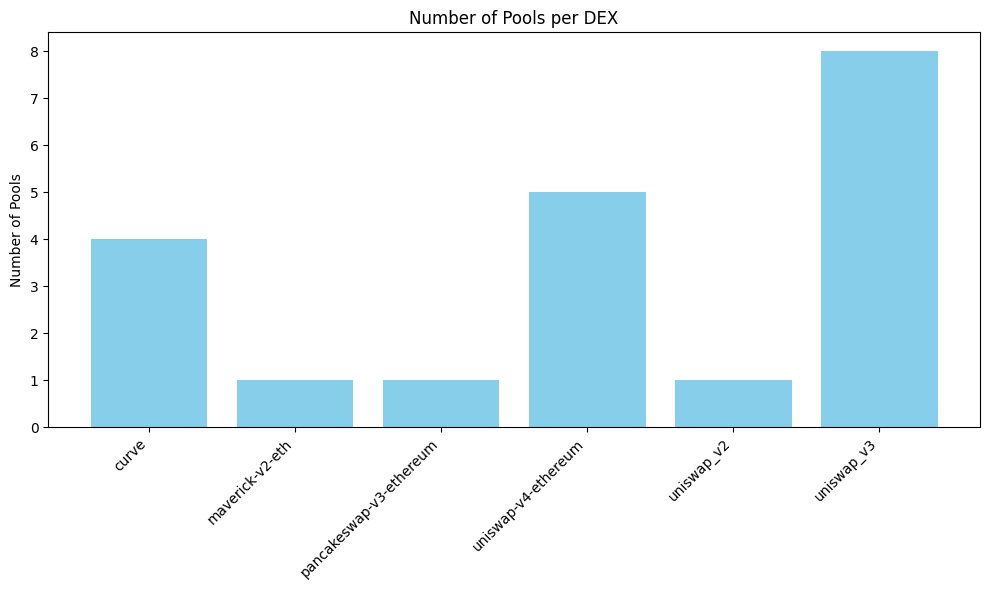

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(dex_counts['dex'], dex_counts['num_pools'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Pools')
plt.title('Number of Pools per DEX')
plt.tight_layout()
plt.show()

In [32]:
# DEX with the most pools
top_dex = dex_counts.idxmax()
top_count = dex_counts.max()

top_dex

top_count

dex          uniswap_v3
num_pools             8
dtype: object